In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 200)

In [4]:
df_train = pd.read_csv('Datasets/train.csv')
df_weather = pd.read_csv('Datasets/weather.csv')
df_spray = pd.read_csv('Datasets/spray.csv')
df_test = pd.read_csv('Datasets/test.csv')
df_submission = pd.read_csv('Datasets/sampleSubmission.csv')

In [5]:
print "Train: ", df_train.shape
print "Spray: ",df_spray.shape
print "df_weather: ", df_weather.shape

Train:  (10506, 12)
Spray:  (14835, 4)
df_weather:  (2944, 22)


In [142]:
print "Train: ", df_test.shape

Train:  (116293, 11)


In [6]:
df_train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [7]:
df_test.head(2)

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


### drop unnecssary columns from Train & Test

In [8]:
df_train = df_train.drop(['Address','AddressNumberAndStreet'], axis=1)
df_test = df_test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis=1)

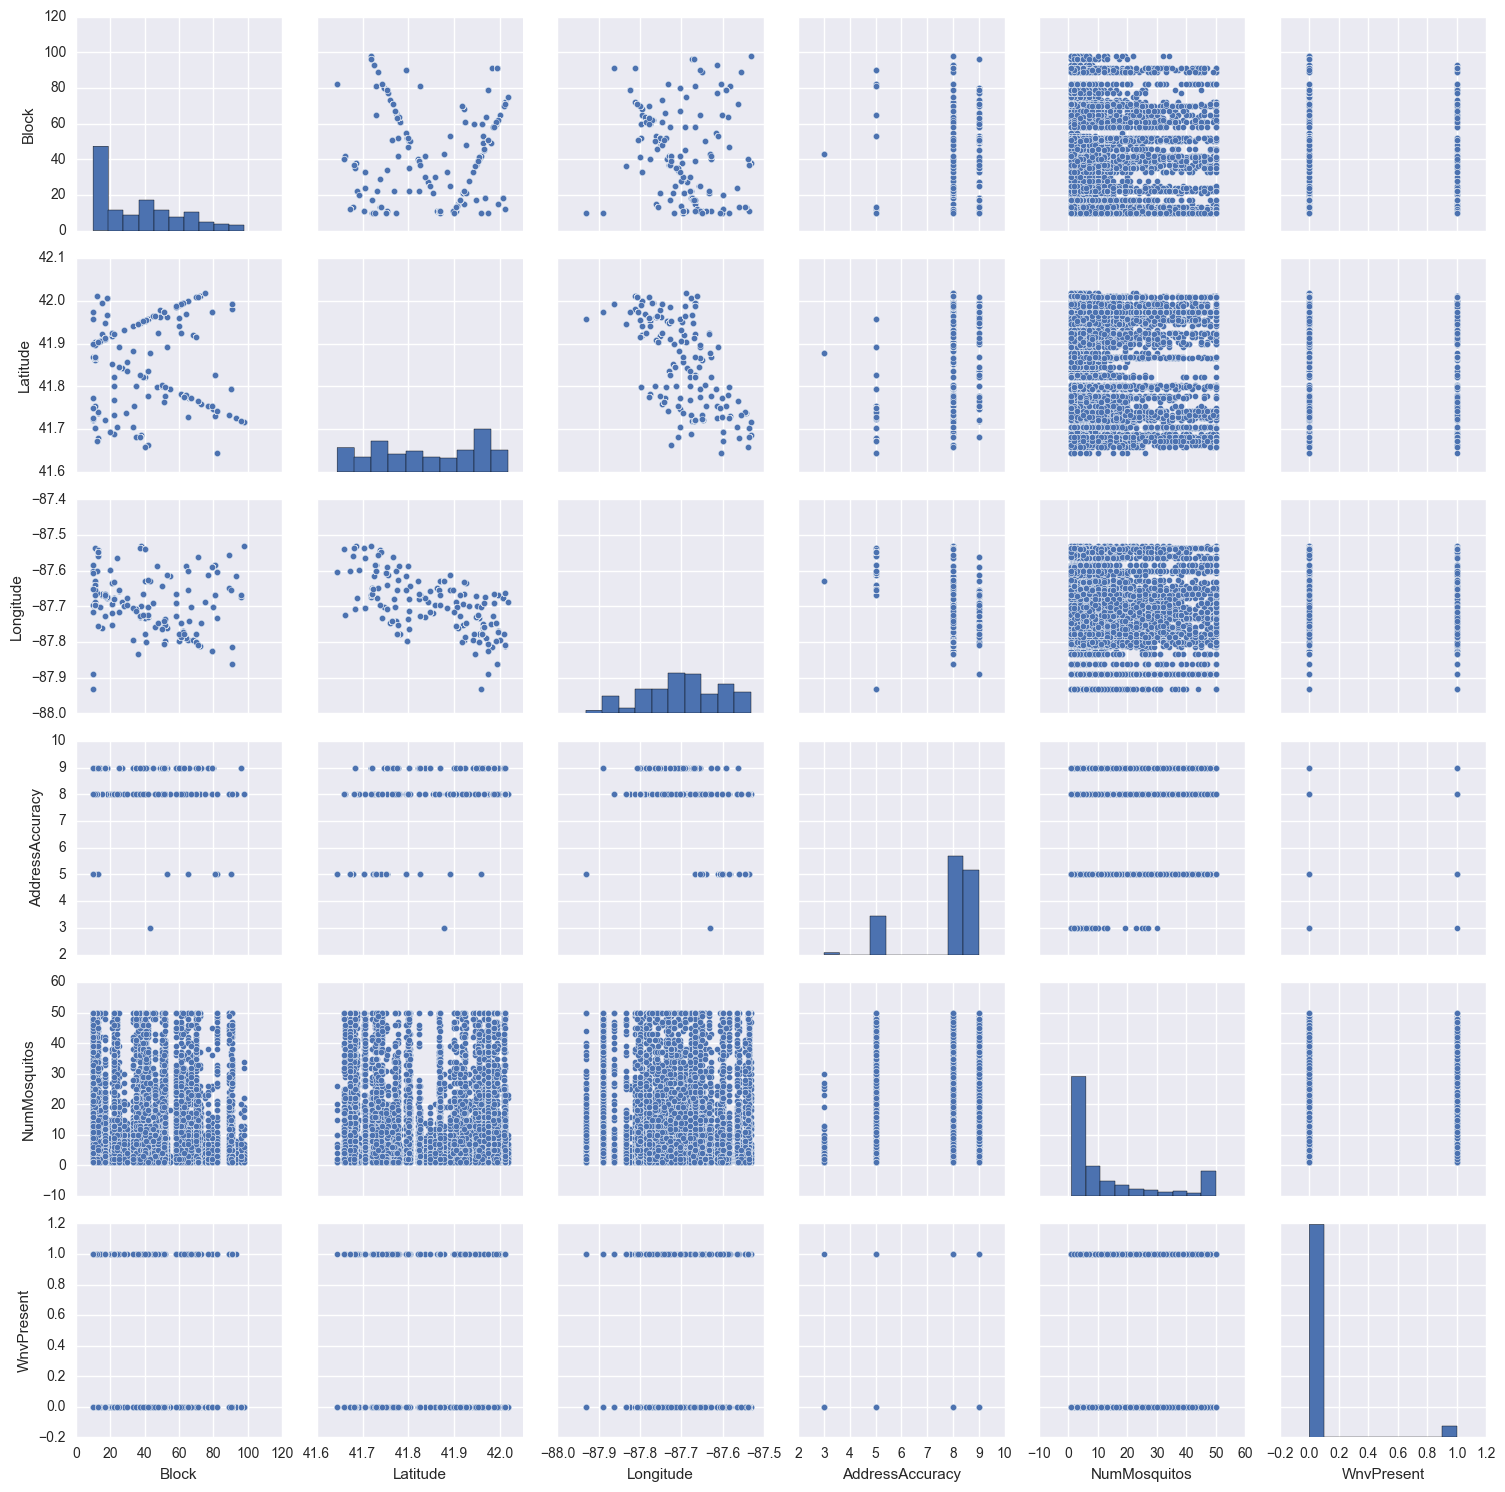

In [9]:
sns.pairplot(df_train)

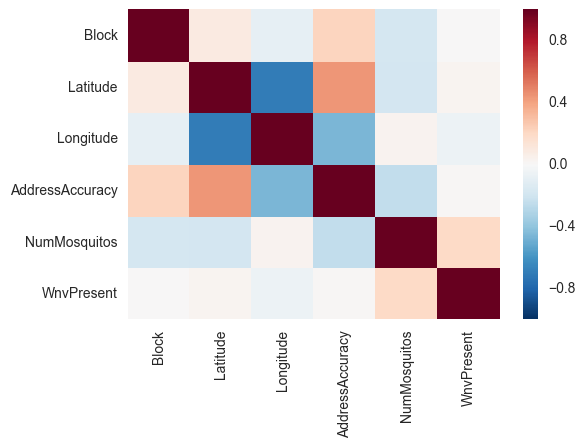

In [10]:
sns.heatmap(df_train.corr())

In [12]:
#convert the categorical data into dummies for Train data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train['Species'] = le.fit_transform(df_train['Species'])
df_train['Street'] = le.fit_transform(df_train['Street'])
df_train['Trap'] = le.fit_transform(df_train['Trap'])

In [13]:
print "Clean and converted train data:"
df_train.head(2)

Clean and converted train data:


,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,2,41,32,1,41.95469,-87.800991,9,1,0
1,2007-05-29,3,41,32,1,41.95469,-87.800991,9,1,0


In [135]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day

In [15]:
#convert the categorical data into dummies for Test data
df_test['Species'] = le.fit_transform(df_test['Species'])
df_test['Street'] = le.fit_transform(df_test['Street'])
df_test['Trap'] = le.fit_transform(df_test['Trap'])

In [16]:
df_test.head(2)

,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy
0,2008-06-11,2,41,36,1,41.95469,-87.800991,9
1,2008-06-11,3,41,36,1,41.95469,-87.800991,9


In [136]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day

In [17]:
df_weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [18]:
df_weather['Station'].value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [33]:
print "Weather minimum and Maximum for Station==1"
print df_weather[df_weather['Station']==1]['Date'].min()
print df_weather[df_weather['Station']==1]['Date'].max()

print "Weather minimum and Maximum for Station==2"
print df_weather[df_weather['Station']==2]['Date'].min()
print df_weather[df_weather['Station']==2]['Date'].max()

Weather minimum and Maximum for Station==1
2007-05-01
2014-10-31
Weather minimum and Maximum for Station==2
2007-05-01
2014-10-31


In [34]:
print "Train Data minimum and Maximum range"
print df_train['Date'].min()
print df_train['Date'].max()

Train Data minimum and Maximum range
2007-05-29
2013-09-26


In [35]:
print "Test Data minimum and Maximum range"
print df_test['Date'].min()
print df_test['Date'].max()

Test Data minimum and Maximum range
2008-06-11
2014-10-02


In [36]:
weather_stn1 = df_weather[df_weather['Station']==1]
weather_stn2 = df_weather[df_weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
df_weather = weather_stn1.merge(weather_stn2, on='Date')

In [55]:
df_weather

,Date,Tmax_x,Tmin_x,Tavg_x,Depart_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,Depth_x,Water1_x,SnowFall_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,Tmax_y,Tmin_y,Tavg_y,Depart_y,DewPoint_y,WetBulb_y,Heat_y,Cool_y,Depth_y,Water1_y,SnowFall_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y
0,2007-05-01,83,50,67,14,51,56,0,2,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2,84,52,68,M,51,57,0,3,M,M,M,0.00,29.18,29.82,2.7,25,9.6
1,2007-05-02,59,42,51,-3,42,47,14,0,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4,60,43,52,M,42,47,13,0,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2,2007-05-03,66,46,56,2,40,48,9,0,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9,67,48,58,M,40,50,7,0,M,M,M,0.00,29.46,30.12,12.9,6,13.2
3,2007-05-04,66,49,58,4,41,50,7,0,0,M,0.0,T,29.31,30.05,10.4,8,10.8,78,51,M,M,42,50,M,M,M,M,M,0.00,29.36,30.04,10.1,7,10.4
4,2007-05-05,66,53,60,5,38,49,5,0,0,M,0.0,T,29.40,30.10,11.7,7,12.0,66,54,60,M,39,50,5,0,M,M,M,T,29.46,30.09,11.2,7,11.5
5,2007-05-06,68,49,59,4,30,46,6,0,0,M,0.0,0.00,29.57,30.29,14.4,11,15.0,68,52,60,M,30,46,5,0,M,M,M,0.00,29.62,30.28,13.8,10,14.5
6,2007-05-07,83,47,65,10,41,54,0,0,0,M,0.0,T,29.38,30.12,8.6,18,10.5,84,50,67,M,39,53,0,2,M,M,M,0.00,29.44,30.12,8.5,17,9.9
7,2007-05-08,82,54,68,12,58,62,0,3,0,M,0.0,0.00,29.29,30.03,2.7,11,5.8,80,60,70,M,57,63,0,5,M,M,M,T,29.36,30.02,2.5,8,5.4
8,2007-05-09,77,61,69,13,59,63,0,4,0,M,0.0,0.13,29.21,29.94,3.9,9,6.2,76,63,70,M,60,63,0,5,M,M,M,0.02,29.28,29.93,3.9,7,5.9
9,2007-05-10,84,56,70,14,52,60,0,5,0,M,0.0,0.00,29.20,29.92,0.7,17,4.1,83,59,71,M,52,61,0,6,M,M,M,0.00,29.26,29.91,2.0,9,3.9


In [50]:
#deleting unncessary column
del df_weather['CodeSum_x']
del df_weather['CodeSum_y']
del df_weather['Sunrise_x']
del df_weather['Sunrise_y']
del df_weather['Sunset_x']
del df_weather['Sunset_y']

In [56]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [65]:
df_weather['Tavg_x'] = df_weather['Tavg_x'].astype(int)
df_weather['Depart_x'] = df_weather['Depart_x'].astype(int)

In [80]:
def convert(x):
    if x=='M':
        return '0'
    else:
        return x

df_weather['WetBulb_x']=df_weather['WetBulb_x'].map(convert)

In [82]:
df_weather['WetBulb_x'] = df_weather['WetBulb_x'].astype(int)
df_weather['Heat_x'] = df_weather['Heat_x'].astype(int)

In [90]:
del df_weather['Water1_x']
del df_weather['Water1_y']

In [102]:
df_weather['SnowFall_x']=df_weather['SnowFall_x'].map({'  T':'1', '0.0':'0', '0.1':'1'})

In [105]:
def convert_T(x):
    if x=='  T':
        return '0.0'
    else:
        return x

In [106]:
df_weather['PrecipTotal_x']=df_weather['PrecipTotal_x'].map(convert_T)
df_weather['PrecipTotal_x']= df_weather['PrecipTotal_x'].astype(float)

In [111]:
df_weather = df_weather.replace({'M':'0','  T':'0'})

In [114]:
df_weather['StnPressure_x']= df_weather['StnPressure_x'].astype(float)

In [129]:
df_weather['SeaLevel_x']= df_weather['SeaLevel_x'].astype(float)
df_weather['AvgSpeed_y']= df_weather['AvgSpeed_y'].astype(float)


In [130]:
for col in df_weather.columns:
    print col
    if df_weather[col].dtypes=='object':
        df_weather[col] = df_weather[col].astype(int)

Date
Tmax_x
Tmin_x
Tavg_x
Depart_x
DewPoint_x
WetBulb_x
Heat_x
Cool_x
Depth_x
SnowFall_x
PrecipTotal_x
StnPressure_x
SeaLevel_x
ResultSpeed_x
ResultDir_x
AvgSpeed_x
Tmax_y
Tmin_y
Tavg_y
Depart_y
DewPoint_y
WetBulb_y
Heat_y
Cool_y
Depth_y
SnowFall_y
PrecipTotal_y
StnPressure_y
SeaLevel_y
ResultSpeed_y
ResultDir_y
AvgSpeed_y


## Merge Train Data with Weather Data

In [137]:
df_train_weather = df_train.merge(df_weather, on='Date')

In [139]:
print df_train_weather.shape
df_train_weather.head()

(10506, 45)


,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Year,Month,Day,Tmax_x,Tmin_x,Tavg_x,Depart_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,Depth_x,SnowFall_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,Tmax_y,Tmin_y,Tavg_y,Depart_y,DewPoint_y,WetBulb_y,Heat_y,Cool_y,Depth_y,SnowFall_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y
0,2007-05-29,2,41,32,1,41.954690,-87.800991,9,1,0,2007,5,29,88,60,74,10,58,65,0,9,0,0,0.0,29.39,30.11,5.8,18,6.5,88,65,77,0,59,66,0,12,0,0,0.0,29.44,30.09,5.8,16,7.4
1,2007-05-29,3,41,32,1,41.954690,-87.800991,9,1,0,2007,5,29,88,60,74,10,58,65,0,9,0,0,0.0,29.39,30.11,5.8,18,6.5,88,65,77,0,59,66,0,12,0,0,0.0,29.44,30.09,5.8,16,7.4
2,2007-05-29,3,62,27,6,41.994991,-87.769279,9,1,0,2007,5,29,88,60,74,10,58,65,0,9,0,0,0.0,29.39,30.11,5.8,18,6.5,88,65,77,0,59,66,0,12,0,0,0.0,29.44,30.09,5.8,16,7.4
3,2007-05-29,2,79,109,13,41.974089,-87.824812,8,1,0,2007,5,29,88,60,74,10,58,65,0,9,0,0,0.0,29.39,30.11,5.8,18,6.5,88,65,77,0,59,66,0,12,0,0,0.0,29.44,30.09,5.8,16,7.4
4,2007-05-29,3,79,109,13,41.974089,-87.824812,8,4,0,2007,5,29,88,60,74,10,58,65,0,9,0,0,0.0,29.39,30.11,5.8,18,6.5,88,65,77,0,59,66,0,12,0,0,0.0,29.44,30.09,5.8,16,7.4


In [140]:
df_test_weather = df_test.merge(df_weather, on='Date')

In [141]:
df_test_weather.shape

(116293, 43)

# Preparing X,y for Train and Test data

In [164]:
Train_y = df_train_weather['WnvPresent']

In [165]:
del df_train_weather['WnvPresent']

In [191]:
del df_train_weather['NumMosquitos']

In [192]:
Train_X = df_train_weather.iloc[:,1:]

In [193]:
Test_X = df_test_weather.iloc[:,1:]

In [194]:
print "Weather minimum and Maximum"
print df_weather['Date'].min()
print df_weather['Date'].max()


Weather minimum and Maximum
2007-05-01 00:00:00
2014-10-31 00:00:00


In [63]:
print "Number of Mosquitos species: ", len(df_train['Species'].value_counts())
df_train['Species'].value_counts()

Number of Mosquitos species:  7


CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

# Baseline Accuracy

In [76]:
print "Baseline Accuracy: 0 - Not present, 1 - Present"
df_train['WnvPresent'].value_counts()/len(df_train['WnvPresent'])*100

Baseline Accuracy: 0 - Not present, 1 - Present


0    94.755378
1     5.244622
Name: WnvPresent, dtype: float64

# Data Visualisation

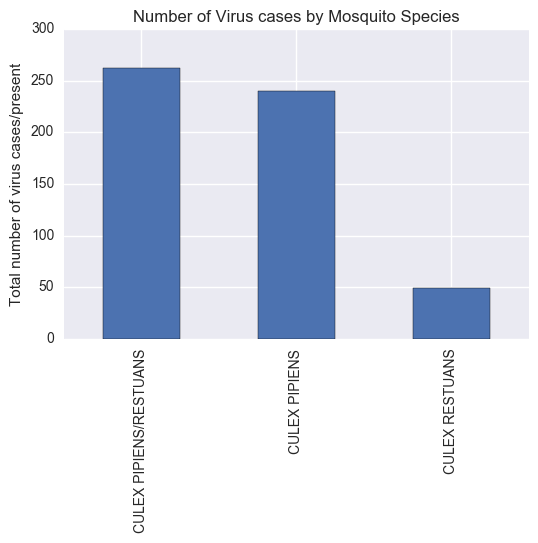

In [78]:
df_train[df_train['WnvPresent']==1]['Species'].value_counts().plot(kind='bar')
#df_train[df_train['WnvPresent']==0]['Species'].value_counts().plot(kind='bar')
plt.title("Number of Virus cases by Mosquito Species")
plt.ylabel("Total number of virus cases/present")
plt.show()

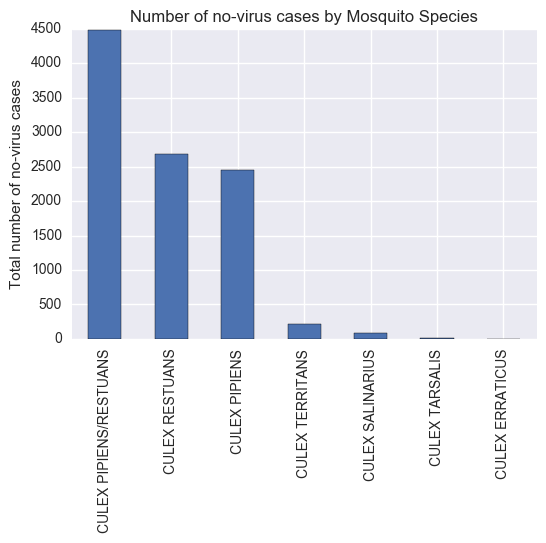

In [80]:
df_train[df_train['WnvPresent']==0]['Species'].value_counts().plot(kind='bar')
plt.title("Number of no-virus cases by Mosquito Species")
plt.ylabel("Total number of no-virus cases")
plt.show()

# Model Creation

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [195]:
logreg = LogisticRegression()
logreg.fit(Train_X, Train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Train data score

In [196]:
y_pred_train = logreg.predict(Train_X)

acc_train = accuracy_score(Train_y, y_pred_train)
print "Training accuracy score:", acc_train

Training accuracy score: 0.947553778793


In [197]:
score_train = cross_val_score(logreg, Train_X, Train_y, cv=10)

In [198]:
print "Cross Validation Score:", score_train.mean()

Cross Validation Score: 0.936035058995


## Fine tuning with GridSearch

In [250]:
X_train, X_test, y_train, y_test = train_test_split(Train_X, Train_y, test_size=0.30, random_state=42)
accuracy_s = []

In [ ]:
X_Train.shape

In [289]:
logreg_parameters = {
    'penalty':['l1','l2'],
    'C':range(1,11,1),
    'solver':['liblinear']
}
logreg_cv = LogisticRegression()


In [290]:
grid = GridSearchCV(logreg_cv, param_grid=logreg_parameters, cv=3)

In [292]:
#grid.fit(X_train, y_train)

print "Grid Search best score:", grid.best_score_
print "Grid Search best parameters:", grid.best_params_

## Test data score

In [202]:
print Train_X.shape
print Test_X.shape

(10506, 42)
(116293, 42)


In [203]:
y_pred_test = logreg.predict(Test_X)

In [214]:
df_test_predict = pd.DataFrame(y_pred_test, columns=['Test_pred'])

In [219]:
print len(df_test_predict[df_test_predict['Test_pred']==0])
print len(df_test_predict[df_test_predict['Test_pred']==1])

116285
8


In [221]:
print "Test Data prediction score for each class"
df_test_predict['Test_pred'].value_counts()/len(df_test_predict['Test_pred'])*100

Test Data prediction score for each class


0    99.993121
1     0.006879
Name: Test_pred, dtype: float64

In [268]:
df_test_predict.to_csv('rn_ms_submission.csv', index=False)

# Plot ROC curve

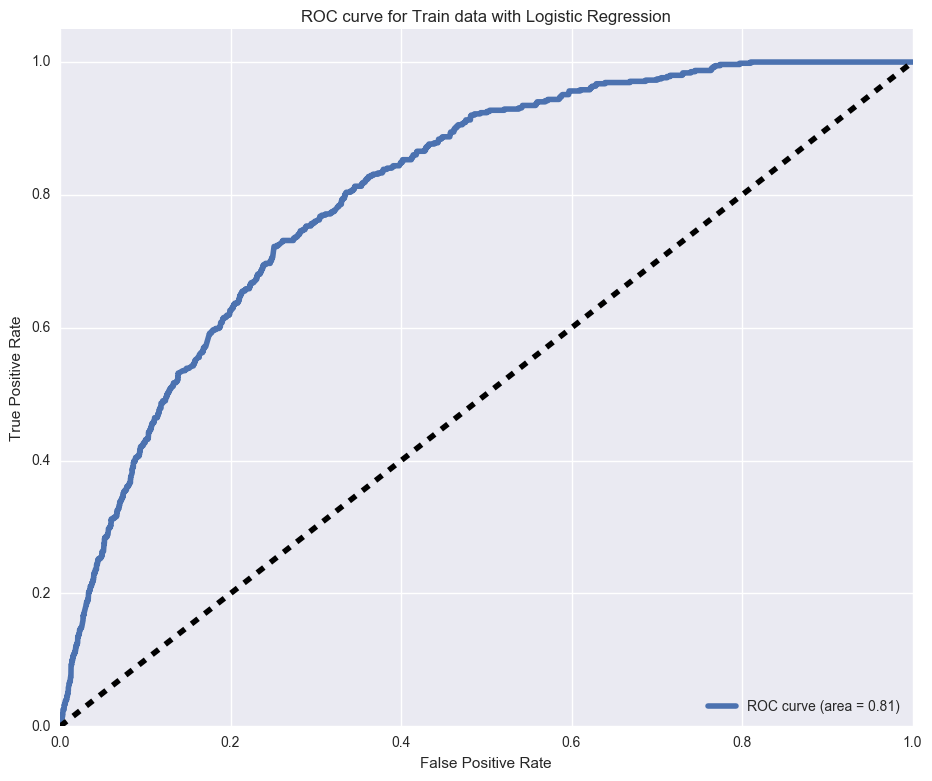

In [267]:

from sklearn.metrics import roc_curve, auc

y_score = logreg.decision_function(Train_X)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Train_y, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Train data with Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Build Decision Tree

In [276]:
dtc = DecisionTreeClassifier(max_depth=50)
dtc.fit(Train_X,Train_y)

y_pred_train_dtc = dtc.predict(Train_X)

print "Accuracy of Train Data" , accuracy_score(Train_y, y_pred_train_dtc)
print classification_report(Train_y, y_pred_train_dtc)

Accuracy of Train Data 0.981058442795
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      9955
          1       0.97      0.66      0.78       551

avg / total       0.98      0.98      0.98     10506



In [281]:
conmat = np.array(confusion_matrix(Train_y, y_pred_train_dtc))
print "Confusion Matrix based on Train data"
confusion = pd.DataFrame(conmat, index=['No_Virus', 'Virus_Preset'],columns=['Predicted_No_Virus', 'Predicted_Virus_Preset'])
confusion

Confusion Matrix based on Train data


,Predicted_No_Virus,Predicted_Virus_Preset
No_Virus,9945,10
Virus_Preset,189,362


# Spilit Level

## Prediction for Test data using decision tree

In [282]:
y_pred_test_dtc = dtc.predict(Test_X)

In [295]:
dtc_test_predict = pd.DataFrame(y_pred_test_dtc, columns=['WnvPresent'])

In [296]:
print "Test Data prediction score for each class"
dtc_test_predict['WnvPresent'].value_counts()/len(dtc_test_predict['WnvPresent'])*100

Test Data prediction score for each class


0    97.32916
1     2.67084
Name: WnvPresent, dtype: float64

In [310]:
dtc_test_predict.head(3)

,Id,WnvPresent
0,1,0
1,2,0
2,3,0


In [305]:
dtc_test_predict.index.values+1

array([     1,      2,      3, ..., 116291, 116292, 116293])

In [309]:
dtc_test_predict = dtc_test_predict[["Id","WnvPresent"]]

In [313]:
dtc_test_predict['Id'] = dtc_test_predict['Id'].astype(str)

In [306]:
dtc_test_predict['Id'] = dtc_test_predict.index.values+1

In [307]:
dtc_test_predict.shape

(116293, 2)

In [314]:
dtc_test_predict.dtypes

Id            object
WnvPresent     int64
dtype: object

In [315]:
dtc_test_predict.to_csv('submission_dtc.csv', index=False)

In [285]:
#fine tuning the model with grid search as the results are improving 

In [286]:
dtc_gs = DecisionTreeClassifier()

In [287]:
params = {"max_depth": range(2,100),"max_leaf_nodes": range(2,50),
          "min_samples_leaf": range(1, 45)
         }
tree_gs_rc = GridSearchCV(dtc_gs, params, scoring='accuracy',cv=5)


In [288]:
tree_gs_rc.fit(Train_X,Train_y)

KeyboardInterrupt: 

# Ensemble RandomForest

In [269]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier

In [264]:
clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=10, min_samples_split=1)
clf.fit(Train_X, Train_y)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Reva/anaconda/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = '/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
/Users/Reva/anaconda/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x1031cf530, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/Reva/...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x1031cf530, file "/Use...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/Users/Reva/...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    469             return self.subapp.start()
    470         if self.poller is not None:
    471             self.poller.start()
    472         self.kernel.start()
    473         try:
--> 474             ioloop.IOLoop.instance().start()
    475         except KeyboardInterrupt:
    476             pass
    477 
    478 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    882                 self._events.update(event_pairs)
    883                 while self._events:
    884                     fd, events = self._events.popitem()
    885                     try:
    886                         fd_obj, handler_func = self._handlers[fd]
--> 887                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    888                     except (OSError, IOError) as e:
    889                         if errno_from_exception(e) == errno.EPIPE:
    890                             # Happens when the client closes the connection
    891                             pass

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    271         if self.control_stream:
    272             self.control_stream.on_recv(self.dispatch_control, copy=False)
    273 
    274         def make_dispatcher(stream):
    275             def dispatcher(msg):
--> 276                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    277             return dispatcher
    278 
    279         for s in self.shell_streams:
    280             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf = ensemble.RandomForestClassifier(n_jobs=-1,...0, min_samples_split=1)\nclf.fit(Train_X, Train_y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-12-08T22:30:56.206661', 'msg_id': '10ADBE4E8CF64CE5A68BEF821F5D5CD4', 'msg_type': 'execute_request', 'session': '1B4A1AD339234800B41B0A89C7E8D12B', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '10ADBE4E8CF64CE5A68BEF821F5D5CD4', 'msg_type': 'execute_request', 'parent_header': {}})
    223             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    224         else:
    225             self.log.debug("%s: %s", msg_type, msg)
    226             self.pre_handler_hook()
    227             try:
--> 228                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['1B4A1AD339234800B41B0A89C7E8D12B']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf = ensemble.RandomForestClassifier(n_jobs=-1,...0, min_samples_split=1)\nclf.fit(Train_X, Train_y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-12-08T22:30:56.206661', 'msg_id': '10ADBE4E8CF64CE5A68BEF821F5D5CD4', 'msg_type': 'execute_request', 'session': '1B4A1AD339234800B41B0A89C7E8D12B', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '10ADBE4E8CF64CE5A68BEF821F5D5CD4', 'msg_type': 'execute_request', 'parent_header': {}}
    229             except Exception:
    230                 self.log.error("Exception in message handler:", exc_info=True)
    231             finally:
    232                 self.post_handler_hook()

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['1B4A1AD339234800B41B0A89C7E8D12B'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf = ensemble.RandomForestClassifier(n_jobs=-1,...0, min_samples_split=1)\nclf.fit(Train_X, Train_y)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': '2016-12-08T22:30:56.206661', 'msg_id': '10ADBE4E8CF64CE5A68BEF821F5D5CD4', 'msg_type': 'execute_request', 'session': '1B4A1AD339234800B41B0A89C7E8D12B', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '10ADBE4E8CF64CE5A68BEF821F5D5CD4', 'msg_type': 'execute_request', 'parent_header': {}})
    385         if not silent:
    386             self.execution_count += 1
    387             self._publish_execute_input(code, parent, self.execution_count)
    388 
    389         reply_content = self.do_execute(code, silent, store_history,
--> 390                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    391 
    392         # Flush output before sending the reply.
    393         sys.stdout.flush()
    394         sys.stderr.flush()

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'clf = ensemble.RandomForestClassifier(n_jobs=-... min_samples_split=1)\nclf.fit(Train_X, Train_y)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'clf = ensemble.RandomForestClassifier(n_jobs=-... min_samples_split=1)\nclf.fit(Train_X, Train_y)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u'clf = ensemble.RandomForestClassifier(n_jobs=-... min_samples_split=1)\nclf.fit(Train_X, Train_y)',), **kwargs={'silent': False, 'store_history': True})
    496             )
    497         self.payload_manager.write_payload(payload)
    498 
    499     def run_cell(self, *args, **kwargs):
    500         self._last_traceback = None
--> 501         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u'clf = ensemble.RandomForestClassifier(n_jobs=-... min_samples_split=1)\nclf.fit(Train_X, Train_y)',)
        kwargs = {'silent': False, 'store_history': True}
    502 
    503     def _showtraceback(self, etype, evalue, stb):
    504         # try to preserve ordering of tracebacks and print statements
    505         sys.stdout.flush()

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'clf = ensemble.RandomForestClassifier(n_jobs=-... min_samples_split=1)\nclf.fit(Train_X, Train_y)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-264-5fe0cecc1856>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 1230fe210, execution_..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x123042db0, file "<ipython-input-264-5fe0cecc1856>", line 2>
        result = <ExecutionResult object at 1230fe210, execution_..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x123042db0, file "<ipython-input-264-5fe0cecc1856>", line 2>, result=<ExecutionResult object at 1230fe210, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x123042db0, file "<ipython-input-264-5fe0cecc1856>", line 2>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', u"import pandas as pd\nimport numpy as np\nimpor...s plt\nget_ipython().magic(u'matplotlib inline')", u"pd.set_option('display.max_columns', 200)", u"df_train = pd.read_csv('Datasets/train.csv')\n...')\ndf_spray = pd.read_csv('Datasets/spray.csv')", u"df_train = pd.read_csv('Datasets/train.csv')\n...n = pd.read_csv('Datasets/sampleSubmission.csv')", u'print "Train: ", df_train.shape\nprint "Spray:...ay.shape\nprint "df_weather: ", df_weather.shape', u'df_train.head(2)', u'df_test.head(2)', u"df_train = df_train.drop(['Address','AddressNu...', 'Address', 'AddressNumberAndStreet'], axis=1)", u'sns.pairplot(df_train)', u'sns.heatmap(df_train.corr())', u"del df_train['City']", u"#convert the categorical data into dummies\nfr...ain['Trap'] = le.fit_transform(df_train['Trap'])", u'print "Clean and converted train data:"\ndf_train.head(2)', u'df_test.head(2)', u"#convert the categorical data into dummies for...test['Trap'] = le.fit_transform(df_test['Trap'])", u'df_test.head(2)', u'df_weather.head(2)', u"df_weather['Station'].value_counts()", u"df_weather[df_weather['Station']==1]", ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {6:          Date                                   ...    1           0  
1             1           0  , 7:    Id        Date                               ...icago, IL  41.95469 -87.800991                9  , 9: <seaborn.axisgrid.PairGrid object>, 10: <matplotlib.axes._subplots.AxesSubplot object>, 13:          Date  Species  Block  Street  Trap  Lat...  
1                9             1           0  , 14:          Date                 Species  Block    ...              9  
1 -87.800991                9  , 16:          Date  Species  Block  Street  Trap  Lat...uracy  
0                9  
1                9  , 17:    Station        Date  Tmax  Tmin Tavg Depart  ...2  
1    29.82          2.7         25      9.6  , 18: 1    1472
2    1472
Name: Station, dtype: int64, 19:       Station        Date  Tmax  Tmin Tavg Depar...6         34     22.9  

[1472 rows x 22 columns], ...}, 'Test_X':         Species  Block  Street  Trap   Latitude ...     17         7.9  

[116293 rows x 42 columns], 'Train_X':        Species  Block  Street  Trap   Latitude  ...       9         4.6  

[10506 rows x 42 columns], 'Train_y': 0        0
1        0
2        0
3        0
4   ...04    0
10505    0
Name: WnvPresent, dtype: int64, 'X_test':        Species  Block  Street  Trap   Latitude  ...       24         8.8  

[3152 rows x 42 columns], 'X_train':        Species  Block  Street  Trap   Latitude  ...       19         8.4  

[7354 rows x 42 columns], ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', u"import pandas as pd\nimport numpy as np\nimpor...s plt\nget_ipython().magic(u'matplotlib inline')", u"pd.set_option('display.max_columns', 200)", u"df_train = pd.read_csv('Datasets/train.csv')\n...')\ndf_spray = pd.read_csv('Datasets/spray.csv')", u"df_train = pd.read_csv('Datasets/train.csv')\n...n = pd.read_csv('Datasets/sampleSubmission.csv')", u'print "Train: ", df_train.shape\nprint "Spray:...ay.shape\nprint "df_weather: ", df_weather.shape', u'df_train.head(2)', u'df_test.head(2)', u"df_train = df_train.drop(['Address','AddressNu...', 'Address', 'AddressNumberAndStreet'], axis=1)", u'sns.pairplot(df_train)', u'sns.heatmap(df_train.corr())', u"del df_train['City']", u"#convert the categorical data into dummies\nfr...ain['Trap'] = le.fit_transform(df_train['Trap'])", u'print "Clean and converted train data:"\ndf_train.head(2)', u'df_test.head(2)', u"#convert the categorical data into dummies for...test['Trap'] = le.fit_transform(df_test['Trap'])", u'df_test.head(2)', u'df_weather.head(2)', u"df_weather['Station'].value_counts()", u"df_weather[df_weather['Station']==1]", ...], 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {6:          Date                                   ...    1           0  
1             1           0  , 7:    Id        Date                               ...icago, IL  41.95469 -87.800991                9  , 9: <seaborn.axisgrid.PairGrid object>, 10: <matplotlib.axes._subplots.AxesSubplot object>, 13:          Date  Species  Block  Street  Trap  Lat...  
1                9             1           0  , 14:          Date                 Species  Block    ...              9  
1 -87.800991                9  , 16:          Date  Species  Block  Street  Trap  Lat...uracy  
0                9  
1                9  , 17:    Station        Date  Tmax  Tmin Tavg Depart  ...2  
1    29.82          2.7         25      9.6  , 18: 1    1472
2    1472
Name: Station, dtype: int64, 19:       Station        Date  Tmax  Tmin Tavg Depar...6         34     22.9  

[1472 rows x 22 columns], ...}, 'Test_X':         Species  Block  Street  Trap   Latitude ...     17         7.9  

[116293 rows x 42 columns], 'Train_X':        Species  Block  Street  Trap   Latitude  ...       9         4.6  

[10506 rows x 42 columns], 'Train_y': 0        0
1        0
2        0
3        0
4   ...04    0
10505    0
Name: WnvPresent, dtype: int64, 'X_test':        Species  Block  Street  Trap   Latitude  ...       24         8.8  

[3152 rows x 42 columns], 'X_train':        Species  Block  Street  Trap   Latitude  ...       19         8.4  

[7354 rows x 42 columns], ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/Reva/general_assembly/Kaggle_West_Nile/<ipython-input-264-5fe0cecc1856> in <module>()
      1 
----> 2 
      3 
      4 
      5 clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=10, min_samples_split=1)
      6 clf.fit(Train_X, Train_y)
      7 
      8 
      9 
     10 

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), X=array([[  2.        ,  41.        ,  32.        ...       9.        ,   4.5999999 ]], dtype=float32), y=array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]]), sample_weight=None)
    321             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    322                              backend="threading")(
    323                 delayed(_parallel_build_trees)(
    324                     t, self, X, y, sample_weight, i, len(trees),
    325                     verbose=self.verbose, class_weight=self.class_weight)
--> 326                 for i, t in enumerate(trees))
        i = 9
    327 
    328             # Collect newly grown trees
    329             self.estimators_.extend(trees)
    330 

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Thu Dec  8 22:30:56 2016
PID: 38730                   Python 2.7.12: /Users/Reva/anaconda/bin/python
...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1173116488, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), array([[  2.        ,  41.        ,  32.        ...       9.        ,   4.5999999 ]], dtype=float32), array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]]), None, 0, 10)
        kwargs = {'class_weight': None, 'verbose': 0}
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1173116488, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), array([[  2.        ,  41.        ,  32.        ...       9.        ,   4.5999999 ]], dtype=float32), array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]]), None, 0, 10), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1173116488, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), X=array([[  2.        ,  41.        ,  32.        ...       9.        ,   4.5999999 ]], dtype=float32), y=array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]]), sample_weight=None, tree_idx=0, n_trees=10, verbose=0, class_weight=None)
    115                 warnings.simplefilter('ignore', DeprecationWarning)
    116                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    117         elif class_weight == 'balanced_subsample':
    118             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    119 
--> 120         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...False, random_state=1173116488, splitter='best')>
        X = array([[  2.        ,  41.        ,  32.        ...       9.        ,   4.5999999 ]], dtype=float32)
        y = array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]])
        sample_weight = None
        curr_sample_weight = array([ 0.,  0.,  1., ...,  3.,  0.,  0.])
    121     else:
    122         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    123 
    124     return tree

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1173116488, splitter='best'), X=array([[  2.        ,  41.        ,  32.        ...       9.        ,   4.5999999 ]], dtype=float32), y=array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]]), sample_weight=array([ 0.,  0.,  1., ...,  3.,  0.,  0.]), check_input=False, X_idx_sorted=None)
    734 
    735         super(DecisionTreeClassifier, self).fit(
    736             X, y,
    737             sample_weight=sample_weight,
    738             check_input=check_input,
--> 739             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    740         return self
    741 
    742 
    743     def predict_proba(self, X, check_input=True):

...........................................................................
/Users/Reva/anaconda/lib/python2.7/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...=False, random_state=1173116488, splitter='best'), X=array([[  2.        ,  41.        ,  32.        ...       9.        ,   4.5999999 ]], dtype=float32), y=array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]]), sample_weight=array([ 0.,  0.,  1., ...,  3.,  0.,  0.]), check_input=False, X_idx_sorted=None)
    194 
    195         if isinstance(self.min_samples_split, (numbers.Integral, np.integer)):
    196             if not 2 <= self.min_samples_split:
    197                 raise ValueError("min_samples_split must be at least 2 "
    198                                  "or in (0, 1], got %s"
--> 199                                  % self.min_samples_split)
        self.min_samples_split = 1
    200             min_samples_split = self.min_samples_split
    201         else:  # float
    202             if not 0. < self.min_samples_split <= 1.:
    203                 raise ValueError("min_samples_split must be at least 2 "

ValueError: min_samples_split must be at least 2 or in (0, 1], got 1
___________________________________________________________________________